In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

def linear_function(x, a, b):
    return a * x + b

In [2]:
import json
with open('../../data/corticalRegion2region.json', 'r') as f:
    corticalRegion2region = json.load(f)

corticalRegion2region['LI'] = 'LIN'
corticalRegion2region['VIS'] = 'VIS'

In [3]:
psd_df = pd.read_csv('../../data/heatmap-PSD95_Density.csv', sep=',')
psd_df.fillna(0, inplace=True)
psd_df = psd_df[(psd_df['AGE']<=99)&(psd_df['AGE']>=60)]
psd_df.drop('AGE', inplace=True, axis=1)
psd_df = psd_df.iloc[:, 13:]
# psd_df.reset_index(inplace=True, drop=True)

psd_df = psd_df.mask(psd_df == 0)
psd_df = psd_df.loc[:, psd_df.isna().sum() <= 9]

psd_df_mean = pd.DataFrame(psd_df.mean(axis=0), columns = ['psd_counts'])
psd_df_mean.index = [i.split('_')[1] for i in psd_df_mean.index]
psd_df_mean.reset_index(inplace=True)
psd_df_mean.columns = ['ori_region', 'psd_counts']

cur_regions = []
for i in psd_df_mean.index:
    tmp = psd_df_mean.loc[i, 'ori_region']
    if tmp in list(corticalRegion2region.keys()):
        cur_regions.append(corticalRegion2region[tmp])
    else:
        try:
            for j in corticalRegion2region.values():
                if tmp.startswith(j):
                    print('tmp: ',tmp, '  j: ',j)
                    cur_regions.append(j)
                    break

        except:
            cur_regions.append(tmp)
                
psd_df_mean['region'] = cur_regions
# psd_df_mean.set_index('region', inplace=True)

psd_df_mean

tmp:  DGgrInf   j:  DG
tmp:  DGgrSup   j:  DG
tmp:  DGmoInf   j:  DG
tmp:  DGmoSup   j:  DG
tmp:  DGpo   j:  DG
tmp:  PTLp   j:  PT
tmp:  SOL   j:  SO
tmp:  ACBc   j:  ACB
tmp:  ACBsh   j:  ACB


,ori_region,psd_counts,region
0,ANcr1gr,36.332741,AN
1,ANcr1mo,43.265686,AN
2,ANcr2gr,34.816554,AN
3,ANcr2mo,43.445445,AN
4,CENT2gr,29.746231,CENT
...,...,...,...
134,SPFp,21.544448,SPFp
135,VAL,56.831629,VAL
136,VM,46.824608,VM
137,VPL,50.508990,VPL


In [4]:
psd_df

,Cerebellum_ANcr1gr,Cerebellum_ANcr1mo,Cerebellum_ANcr2gr,Cerebellum_ANcr2mo,Cerebellum_CENT2gr,Cerebellum_CENT2mo,Cerebellum_CENT3gr,Cerebellum_CENT3mo,Cerebellum_COPYgr,Cerebellum_COPYmo,...,Thalamus_AV,Thalamus_LD,Thalamus_LP,Thalamus_PO,Thalamus_RT,Thalamus_SPFp,Thalamus_VAL,Thalamus_VM,Thalamus_VPL,Thalamus_VPM
25,39.790000,36.113750,33.73500,42.601250,NaN,NaN,31.356250,42.817500,34.383750,45.196250,...,NaN,67.335702,66.948715,59.789459,18.768859,NaN,NaN,NaN,54.178151,53.210684
26,33.748706,47.166866,NaN,NaN,NaN,NaN,32.393336,37.950352,34.155317,47.166866,...,55.495919,71.826749,74.861682,74.572641,25.724671,23.701382,67.202089,56.218522,54.050713,58.675373
27,NaN,NaN,29.84493,36.055435,NaN,NaN,26.912191,30.707500,NaN,NaN,...,34.785010,43.876547,43.283621,50.728140,15.284323,16.733698,40.055466,33.269754,34.916772,41.373080
28,NaN,NaN,29.19375,38.925000,NaN,NaN,24.868750,37.627500,NaN,NaN,...,NaN,72.227500,70.065000,77.850000,21.841250,24.220000,NaN,NaN,46.493750,57.738750
29,NaN,NaN,NaN,NaN,25.517500,30.058750,27.031250,28.761250,NaN,NaN,...,NaN,63.793750,63.793750,70.497500,19.462500,21.192500,NaN,NaN,53.521875,54.062500
30,NaN,NaN,34.38375,40.222500,NaN,NaN,39.249375,41.520000,NaN,NaN,...,55.576250,75.471250,72.119375,88.878750,24.868750,25.085000,64.658750,47.250625,49.088750,64.658750
31,NaN,NaN,NaN,NaN,33.974962,35.306324,38.389169,38.072976,NaN,NaN,...,52.685036,62.320742,53.984824,67.912231,19.202892,18.104008,51.075741,45.389098,48.817898,65.657740
32,NaN,NaN,39.14125,49.521250,NaN,NaN,44.604010,47.911389,39.141250,46.493750,...,48.338991,70.472399,64.297182,84.188986,21.785779,24.944589,61.166097,51.995042,54.767479,70.068964
33,35.897500,41.790312,36.54625,40.114375,NaN,NaN,34.708125,33.032187,33.518750,40.655000,...,NaN,69.543787,73.365578,76.533019,21.360717,21.348932,NaN,NaN,57.693500,64.353787
34,37.195000,44.331250,37.84375,49.305000,NaN,NaN,36.330000,36.978750,39.573750,43.898750,...,NaN,64.442500,59.036250,72.443750,19.678750,19.570625,NaN,NaN,47.358750,58.387500


In [5]:
psd_df_mean['region'] = cur_regions
# psd_df_mean.set_index('region', inplace=True)

psd_df_mean

,ori_region,psd_counts,region
0,ANcr1gr,36.332741,AN
1,ANcr1mo,43.265686,AN
2,ANcr2gr,34.816554,AN
3,ANcr2mo,43.445445,AN
4,CENT2gr,29.746231,CENT
...,...,...,...
134,SPFp,21.544448,SPFp
135,VAL,56.831629,VAL
136,VM,46.824608,VM
137,VPL,50.508990,VPL


In [6]:
psd_df_mean = psd_df_mean[['psd_counts', 'region']].groupby('region').mean()
psd_df_mean

,psd_counts
region,
ACB,77.305377
AMB,16.744495
AN,39.465106
AOB,46.659019
AON,95.321596
...,...
VIS,98.418648
VM,46.824608
VPL,50.508990


In [7]:
sap_df = pd.read_csv('../../data/heatmap-SAP102_Density.csv', sep=',')
sap_df.fillna(0, inplace=True)
sap_df = sap_df[(sap_df['AGE']<=99)&(sap_df['AGE']>=60)]
sap_df.drop('AGE', inplace=True, axis=1)
sap_df = sap_df.iloc[:, 13:]
# sap_df.reset_index(inplace=True, drop=True)

sap_df = sap_df.mask(sap_df == 0)
sap_df = sap_df.loc[:, sap_df.isna().sum() <= 9]

sap_df_mean = pd.DataFrame(sap_df.mean(axis=0), columns = ['sap_counts'])
sap_df_mean.index = [i.split('_')[1] for i in sap_df_mean.index]
sap_df_mean.reset_index(inplace=True)
sap_df_mean.columns = ['ori_region', 'sap_counts']

cur_regions = []
for i in sap_df_mean.index:
    tmp = sap_df_mean.loc[i, 'ori_region']
    if tmp in list(corticalRegion2region.keys()):
        cur_regions.append(corticalRegion2region[tmp])
    else:
        try:
            for j in corticalRegion2region.values():
                if tmp.startswith(j):
                    print('tmp: ',tmp, '  j: ',j)
                    cur_regions.append(j)
                    break
        except:
            cur_regions.append(tmp)
                             
sap_df_mean['region'] = cur_regions
# sap_df_mean.set_index('region', inplace=True)
sap_df_mean

tmp:  DGgrInf   j:  DG
tmp:  DGgrSup   j:  DG
tmp:  DGmoInf   j:  DG
tmp:  DGmoSup   j:  DG
tmp:  DGpo   j:  DG
tmp:  PTLp   j:  PT
tmp:  SOL   j:  SO
tmp:  ACBc   j:  ACB
tmp:  ACBsh   j:  ACB


,ori_region,sap_counts,region
0,ANcr1gr,27.766500,AN
1,ANcr1mo,20.024750,AN
2,ANcr2gr,30.989826,AN
3,ANcr2mo,26.238333,AN
4,CENT2gr,16.597188,CENT
...,...,...,...
134,SPFp,6.728979,SPFp
135,VAL,64.118125,VAL
136,VM,48.050750,VM
137,VPL,53.421941,VPL


In [8]:
sap_df_mean = sap_df_mean[['sap_counts', 'region']].groupby('region').mean()
sap_df_mean

,sap_counts
region,
ACB,72.176510
AMB,7.798516
AN,26.254852
AOB,50.836771
AON,95.789740
...,...
VIS,78.242727
VM,48.050750
VPL,53.421941


In [9]:
syn_df = pd.concat([psd_df_mean, sap_df_mean], axis=1)
syn_df

,psd_counts,sap_counts
region,,
ACB,77.305377,72.176510
AMB,16.744495,7.798516
AN,39.465106,26.254852
AOB,46.659019,50.836771
AON,95.321596,95.789740
...,...,...
VIS,98.418648,78.242727
VM,46.824608,48.050750
VPL,50.508990,53.421941


In [10]:
den_contact = pd.read_csv('../../data/ppss_from_pacs.csv', sep=',', index_col=0)
den_contact

,Unnamed: 0,x,y,z,source_cell,target_cell,branch_level,target_region,color
0,0,6719.33,4732.66,4685.44,15257_2226_x16029_y23953,SEU-ALLEN_local_182712_15287_15752_5070_CCFv3.swc,8,VAL,#acc2d9
1,1,6719.74,4733.37,4685.04,15257_2226_x16029_y23953,SEU-ALLEN_local_182712_15287_15752_5070_CCFv3.swc,8,VAL,#acc2d9
2,2,6720.34,4733.72,4684.31,15257_2226_x16029_y23953,SEU-ALLEN_local_182712_15287_15752_5070_CCFv3.swc,8,VAL,#acc2d9
3,3,6720.94,4734.06,4683.59,15257_2226_x16029_y23953,SEU-ALLEN_local_182712_15287_15752_5070_CCFv3.swc,8,VAL,#acc2d9
4,4,6686.39,4743.11,4648.30,15257_2226_x16029_y23953,SEU-ALLEN_local_182712_15287_15752_5070_CCFv3.swc,6,VAL,#acc2d9
...,...,...,...,...,...,...,...,...,...
17995300,22299324,3283.52,3644.60,8860.40,pre_18868_00465,SEU-ALLEN_local_201584_8835_21199_4542_CCFv3.swc,9,MOp,#1f77b4
17995301,22299325,3283.40,3647.35,8860.64,pre_18868_00465,SEU-ALLEN_local_201584_8835_21214_4542_CCFv3.swc,7,MOp,#1f77b4
17995302,22299326,3283.27,3646.37,8860.83,pre_18868_00465,SEU-ALLEN_local_201584_8835_21214_4542_CCFv3.swc,7,MOp,#1f77b4
17995303,22299327,3283.14,3645.40,8861.01,pre_18868_00465,SEU-ALLEN_local_201584_8835_21214_4542_CCFv3.swc,7,MOp,#1f77b4


In [11]:
soma_feature = pd.read_csv('../../data/155k_DEN_soma_feature.csv', 
                           sep=',', index_col=0)
soma_feature

,x,y,z,source_region,source_region_withCorticalRegion
swc_id,,,,,
SEU-ALLEN_local_15257_10001_19868_8155_CCFv3.swc,11287.600,3667.825,5563.125,fiber tracts,arb
SEU-ALLEN_local_15257_10008_10862_6996_CCFv3.swc,9625.025,3764.025,9017.726,ENTm,ENTm5
SEU-ALLEN_local_15257_10012_10978_7039_CCFv3.swc,9682.675,3754.125,8985.000,ENTm,ENTm5
SEU-ALLEN_local_15257_10020_17924_8129_CCFv3.swc,11267.750,3630.950,6364.775,fiber tracts,arb
SEU-ALLEN_local_15257_10028_28224_6732_CCFv3.swc,9298.925,3983.150,2374.200,SUB,SUB
...,...,...,...,...,...
SEU-ALLEN_local_236174_7626_18076_3068_CCFv3.swc,3998.550,1907.975,5585.175,ACAd,ACAd1
SEU-ALLEN_local_236174_8122_17844_3762_CCFv3.swc,4842.475,2017.425,5512.275,ACAd,ACAd2/3
SEU-ALLEN_local_236174_8813_17916_4826_CCFv3.swc,5990.175,2143.925,5498.300,ACAv,ACAv2/3


In [12]:
soma_feature = soma_feature[soma_feature['source_region'].isin(list(den_contact['target_region'].unique()))].copy()
soma_ct = soma_feature['source_region'].value_counts()
del soma_ct['fiber tracts']
# soma_ct = soma_ct[0:15]
soma_ct = soma_ct[soma_ct>=30]
soma_ct

source_region
CP     21802
MOB    16644
IC      6709
AN      4770
CUL     4444
       ...  
SNc       32
APN       32
CA2       31
FN        31
SMT       30
Name: count, Length: 175, dtype: int64

In [13]:
import json
with open('../../data/region2primaryRegion.json', 'r') as f:
    region2primaryRegion = json.load(f)
    
sele_region = region2primaryRegion.keys()
order_list = []

for i in sele_region:
    if i in list(soma_ct.index):
        order_list.append(i)

print(len(order_list))

den_contact_tmp = den_contact[den_contact['target_region'].isin(order_list)].copy()

den_contact_tmp.loc[:, 'count'] = 1

wide_df2_ = den_contact_tmp.pivot_table(index='target_region', columns=['branch_level'], 
                                        values=['count'], aggfunc='sum', fill_value=0)

wide_df2_

173


count                                                         \
branch_level      1       2       3       4       5       6       7      8    
target_region                                                                 
AAA              144     673     853     823     829     399     335    121   
ACAd            3665   11133   22013   31999   32171   25411   19162  12339   
ACAv            3036    8519   15984   19129   19563   17962   13964   9883   
ACB            35287  113875  214127  286363  289798  236846  164850  94084   
AHN              367    1803    2026    2249    1289     603     282    192   
...              ...     ...     ...     ...     ...     ...     ...    ...   
VM              1266    4916   10949   18066   24360   25883   22083  17962   
VPL              445    2387    3129    2718    3789    3710    2792   2853   
VPM             1638    5430    6753    7372    8506    7042    6135   4801   
VTA              312    1022    1668    1716    1239    1001     501    182   
ZI               773    2324    4906    9538    9955   10205    7796   4704   

                             ...                                          
branch_level      9      10  ...    14   15   16   17  18 19 20 21 22 23  
target_region                ...                                          
AAA               55     26  ...     0    0    0    0   0  0  0  0  0  0  
ACAd            6836   4134  ...   142   29    0    0   0  0  0  0  0  0  
ACAv            5966   3474  ...   198   45   84   26  22  0  0  0  0  0  
ACB            49795  25866  ...  1258  329  165  126  14  0  0  0  0  0  
AHN                0      0  ...     0    0    0    0   0  0  0  0  0  0  
...              ...    ...  ...   ...  ...  ...  ...  .. .. .. .. .. ..  
VM             10437   5787  ...   136   99    9    0   0  0  0  0  0  0  
VPL             1707    856  ...    87    9    0    0   0  0  0  0  0  0  
VPM             3161   1427  ...    50   49    8    4   0  0  0  0  0  0  
VTA               40    117  ...     0    0    0    0   0  0  0  0  0  0  
ZI              3173   2058  ...   120    1    0    0   0  0  0  0  0  0  

[173 rows x 23 columns]

In [14]:
synapse_df = wide_df2_.copy()

In [15]:
tmp_index = []
for i in synapse_df.index:
    if i in list(syn_df.index):
        tmp_index.append(i)

synapse_df = synapse_df.loc[tmp_index]
syn_df = syn_df.loc[tmp_index]
print(len(syn_df))
syn_df

64


,psd_counts,sap_counts
region,,
ACB,77.305377,72.176510
AN,39.465106,26.254852
AOB,46.659019,50.836771
AON,95.321596,95.789740
APN,23.718428,5.894815
...,...,...
VII,14.674368,3.578938
VM,46.824608,48.050750
VPL,50.508990,53.421941


In [16]:
tmp_ct = synapse_df.sum(axis=1)

syn_df = pd.concat([syn_df, tmp_ct], axis=1)
syn_df.columns = list(syn_df.columns)[:-1] + ['#ppss']
syn_df['combine_synapse'] = syn_df['psd_counts'] + syn_df['sap_counts']

syn_df

,psd_counts,sap_counts,#ppss,combine_synapse
ACB,77.305377,72.176510,1534740,149.481887
AN,39.465106,26.254852,115,65.719959
AOB,46.659019,50.836771,867,97.495790
AON,95.321596,95.789740,334353,191.111335
APN,23.718428,5.894815,622,29.613242
...,...,...,...,...
VII,14.674368,3.578938,192,18.253305
VM,46.824608,48.050750,147300,94.875358
VPL,50.508990,53.421941,25132,103.930931
VPM,59.732978,71.123314,53858,130.856292


In [17]:
len(syn_df.index)

64

In [18]:
syn_df['log_ppss'] = np.log2(syn_df['#ppss'])
syn_df['log_combine_synapse'] = np.log2(syn_df['combine_synapse'])

syn_df

,psd_counts,sap_counts,#ppss,combine_synapse,log_ppss,log_combine_synapse
ACB,77.305377,72.176510,1534740,149.481887,20.549563,7.223827
AN,39.465106,26.254852,115,65.719959,6.845490,6.038260
AOB,46.659019,50.836771,867,97.495790,9.759888,6.607268
AON,95.321596,95.789740,334353,191.111335,18.351013,7.578270
APN,23.718428,5.894815,622,29.613242,9.280771,4.888171
...,...,...,...,...,...,...
VII,14.674368,3.578938,192,18.253305,7.584963,4.190086
VM,46.824608,48.050750,147300,94.875358,17.168398,6.567962
VPL,50.508990,53.421941,25132,103.930931,14.617238,6.699481
VPM,59.732978,71.123314,53858,130.856292,15.716873,7.031839


In [19]:
x = syn_df['log_ppss']
y = syn_df['log_combine_synapse']

params, covariance = curve_fit(linear_function, x, y)
a, b = params
x_fit = np.linspace(min(x)-1, max(x)+5, 100)
y_fit = linear_function(x_fit, a, b)

In [20]:
len(syn_df)

64

PearsonRResult(statistic=0.594970833324494, pvalue=2.1641122549325033e-07)


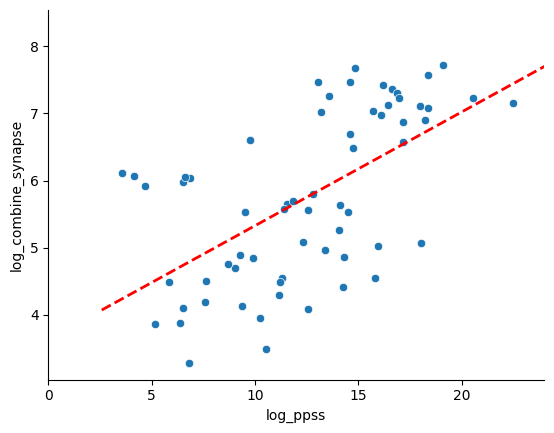

In [21]:
print(stats.pearsonr(syn_df['log_ppss'], syn_df['log_combine_synapse']))
sns.scatterplot(data=syn_df,x='log_ppss', y='log_combine_synapse')

plt.plot(x_fit, y_fit, color='red', 
         linewidth=2, linestyle='--',
         label='Fitted Curve')
plt.xlim([0, 24])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('./cmp_synaptome.svg', bbox_inches='tight')